In [1]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver
from typing import Annotated, TypedDict

In [3]:
load_dotenv()

True

In [4]:
model = ChatGroq(model="openai/gpt-oss-20b")

In [5]:
class JokeState(TypedDict):
    topic : str
    joke: str
    explaination: str

In [13]:
def gen_joke(state: JokeState):
    topic = state['topic']
    prompt = f"Generate a joke on the topic - {topic}"
    response = model.invoke(prompt).content
    return {'joke' : response}

In [14]:
def gen_explain(state: JokeState):
    joke = state['joke']
    prompt = f"Generate an explain of the joke - {joke}"
    response = model.invoke(prompt).content
    return {'explaination' : response}

In [15]:
# Define Graph
graph = StateGraph(JokeState)

# Add Nodes
graph.add_node('gen_joke', gen_joke)
graph.add_node('gen_explain', gen_explain)

# Add Edge
graph.add_edge(START, 'gen_joke')
graph.add_edge('gen_joke', 'gen_explain')
graph.add_edge('gen_explain', END)

# Add Persistance
checkpointer = InMemorySaver()

In [16]:
# Compile the graph
workflow = graph.compile(checkpointer=checkpointer)

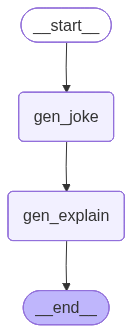

In [17]:
workflow

In [45]:
config_1 = {"configurable" : {"thread_id" : "1"}}
workflow.invoke({'topic': 'chicken tikka'}, config=config_1)

{'topic': 'chicken tikka',
 'joke': 'Why did the chicken bring a passport to the kitchen?\n\nBecause it heard the chicken tikka was a *spicy* international dish and wanted to make sure it could *tikka* its way into every country’s flavor menu!',
 'explaination': '**Why the joke is funny – a word‑play & absurd‑anthropomorphism breakdown**\n\n| Element | How it works | Why it tickles the funny bone |\n|---------|--------------|------------------------------|\n| **Anthropomorphism (the chicken as a traveler)** | The joke starts with a chicken, a farm animal, suddenly behaving like a globe‑trotter: “Why did the chicken bring a passport to the kitchen?” | The absurdity of a chicken carrying a passport (something a human would need to cross borders) is a classic “animal‑in‑human‑situation” gag. It sets up the punchline’s twist. |\n| **The “passport” set‑up** | A passport is a passport – a travel document. The joke uses it to imply that the chicken is planning to “travel” to many different pl

In [46]:
list(workflow.get_state_history(config_1))

[StateSnapshot(values={'topic': 'chicken tikka', 'joke': 'Why did the chicken bring a passport to the kitchen?\n\nBecause it heard the chicken tikka was a *spicy* international dish and wanted to make sure it could *tikka* its way into every country’s flavor menu!', 'explaination': '**Why the joke is funny – a word‑play & absurd‑anthropomorphism breakdown**\n\n| Element | How it works | Why it tickles the funny bone |\n|---------|--------------|------------------------------|\n| **Anthropomorphism (the chicken as a traveler)** | The joke starts with a chicken, a farm animal, suddenly behaving like a globe‑trotter: “Why did the chicken bring a passport to the kitchen?” | The absurdity of a chicken carrying a passport (something a human would need to cross borders) is a classic “animal‑in‑human‑situation” gag. It sets up the punchline’s twist. |\n| **The “passport” set‑up** | A passport is a passport – a travel document. The joke uses it to imply that the chicken is planning to “travel” 

In [21]:
config_2 = {"configurable" : {"thread_id" : "2"}}
workflow.invoke({'topic': 'mashed potato'}, config=config_2)

{'topic': 'mashed potato',
 'joke': 'Why did the mashed potato bring a ladder to the dinner table?  \nBecause it heard the gravy was going to “spud” the whole thing up!',
 'explaination': '**The joke hinges on a double‑meaning pun and a touch of absurd visual humor.**\n\n1. **“Spud” as a noun**  \n   In everyday English, a *spud* is simply a potato. So when the joke says the gravy “was going to **spud** the whole thing up,” it’s already hinting that something potato‑related is about to happen.\n\n2. **“Spud” as a verb**  \n   Less commonly, *spud* can mean “to start” or “to get going.” Think of the phrase “to spud the engine” or “to spud the project.” In the joke, the mashed potato interprets the gravy’s promise to “spud” the meal as a literal potato‑action: the gravy is going to *be a potato* and *start* the dinner.\n\n3. **The ladder**  \n   The image of a mashed potato lugging a ladder to the table is absurd and visual. It’s a classic “object does something out of context” gag—like 

In [22]:
list(workflow.get_state_history(config_2))

[StateSnapshot(values={'topic': 'mashed potato', 'joke': 'Why did the mashed potato bring a ladder to the dinner table?  \nBecause it heard the gravy was going to “spud” the whole thing up!', 'explaination': '**The joke hinges on a double‑meaning pun and a touch of absurd visual humor.**\n\n1. **“Spud” as a noun**  \n   In everyday English, a *spud* is simply a potato. So when the joke says the gravy “was going to **spud** the whole thing up,” it’s already hinting that something potato‑related is about to happen.\n\n2. **“Spud” as a verb**  \n   Less commonly, *spud* can mean “to start” or “to get going.” Think of the phrase “to spud the engine” or “to spud the project.” In the joke, the mashed potato interprets the gravy’s promise to “spud” the meal as a literal potato‑action: the gravy is going to *be a potato* and *start* the dinner.\n\n3. **The ladder**  \n   The image of a mashed potato lugging a ladder to the table is absurd and visual. It’s a classic “object does something out o

# Time Travel

In [47]:
workflow.get_state({"configurable" : {"thread_id" : "1", "checkpoint_id" : "1f096598-bc93-69da-8007-13c25f86b941"}})

StateSnapshot(values={'topic': 'chicken tikka', 'joke': 'Why did the chicken tikka go to the gym?  \nBecause it heard it could “burn” calories with a little extra *tikka*—but it only managed to turn the whole pot into a hot‑pot!', 'explaination': '**Why the joke works – a quick breakdown**\n\n| Element | What it’s playing on | Why it’s funny |\n|---------|---------------------|----------------|\n| **“Chicken tikka”** | A popular Indian‑style marinated chicken dish that’s usually *cooked* (or “tikka‑ed”) in a tandoor. | The joke starts by treating the dish itself as if it were a living, sentient creature that could decide to go to the gym. That absurd anthropomorphism is the first punch. |\n| **“Go to the gym”** | A place people go to exercise and burn calories. | It’s the usual setup for a “why did X go to the gym?” joke. |\n| **“Burn calories”** | The goal of working out: you “burn” (spend) calories. | The word *burn* is key because it has a double meaning: in fitness, you burn calori

In [48]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f096598-bc93-69da-8007-13c25f86b941"}})

{'topic': 'chicken tikka',
 'joke': 'Why did the chicken tikka bring a ladder to the kitchen?  \nBecause it heard the best flavor is at the “high” spice level!',
 'explaination': '**Why the joke works**\n\n1. **The set‑up is a play on a familiar image**  \n   - In everyday life, a *chicken* is a living bird that would never bring a ladder to the kitchen.  \n   - *Chicken tikka* is a popular Indian‑American dish made from marinated chicken pieces. The joke replaces the literal bird with the dish, creating a humorous incongruity.\n\n2. **The punchline hinges on a double meaning of “high”**  \n   - **Literal “high”** – A ladder is used to reach something that is physically higher than you.  \n   - **Figurative “high”** – In cooking, “high spice level” means a very hot or intense flavor.  \n   The joke says the chicken tikka brought a ladder because it “heard the best flavor is at the ‘high’ spice level.” It’s as if the dish is literally climbing up to get a hotter seasoning.\n\n3. **Wordp

In [49]:
list(workflow.get_state_history(config_1))

[StateSnapshot(values={'topic': 'chicken tikka', 'joke': 'Why did the chicken tikka bring a ladder to the kitchen?  \nBecause it heard the best flavor is at the “high” spice level!', 'explaination': '**Why the joke works**\n\n1. **The set‑up is a play on a familiar image**  \n   - In everyday life, a *chicken* is a living bird that would never bring a ladder to the kitchen.  \n   - *Chicken tikka* is a popular Indian‑American dish made from marinated chicken pieces. The joke replaces the literal bird with the dish, creating a humorous incongruity.\n\n2. **The punchline hinges on a double meaning of “high”**  \n   - **Literal “high”** – A ladder is used to reach something that is physically higher than you.  \n   - **Figurative “high”** – In cooking, “high spice level” means a very hot or intense flavor.  \n   The joke says the chicken tikka brought a ladder because it “heard the best flavor is at the ‘high’ spice level.” It’s as if the dish is literally climbing up to get a hotter seas

# Fault Tolerence

In [23]:
import time

In [33]:
def CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [34]:
def step_1(state: CrashState) -> CrashState:
    print("Step 1 executed")
    return {"step1": "done", "input": state["input"]}

In [35]:
def step_2(state: CrashState) -> CrashState:
    print("Step 2 testing... now manually interrupt ")
    time.sleep(1000) 
    return {"step2": "done"}

In [36]:
def step_3(state: CrashState) -> CrashState:
    print("Step 3 executed")
    return {"done": True}

In [37]:
# Define Graph
ft_graph = StateGraph(CrashState)

# Add Nodes
ft_graph.add_node("step_1", step_1)
ft_graph.add_node("step_2", step_2)
ft_graph.add_node("step_3", step_3)

# Set Entry Point
ft_graph.set_entry_point("step_1")

# Add Edge
ft_graph.add_edge("step_1", "step_2")
ft_graph.add_edge("step_2", "step_3")
ft_graph.add_edge("step_3", END)

# Add Persistance
checkpointer_ft = InMemorySaver()

/Users/ayangairola/miniconda3/envs/langgraph-prac/lib/python3.9/site-packages/langgraph/graph/state.py:103: UserWarning: Invalid state_schema: <function CrashState at 0x1139d35e0>. Expected a type or Annotated[type, reducer]. Please provide a valid schema to ensure correct updates.
 See: https://langchain-ai.github.io/langgraph/reference/graphs/#stategraph
  warnings.warn(


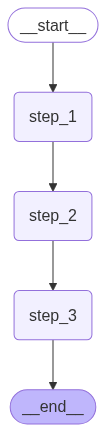

In [40]:
workflow_ft = ft_graph.compile(checkpointer=checkpointer_ft)
workflow_ft

In [ ]:
try:
    print("Running graph: Please manually interrupt during Step 2...")
    workflow_ft.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated)")

In [ ]:
print("Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("Final State:", final_state)

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))